Step 1: Big Picture and Setup

The goal is to build a model that most accurately predicts the median value of houses in Boston.

In [ ]:
#Andrew Lin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Step 2: Get the Data


In [ ]:
housing = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
housing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Giving Names to the Columns
housing.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


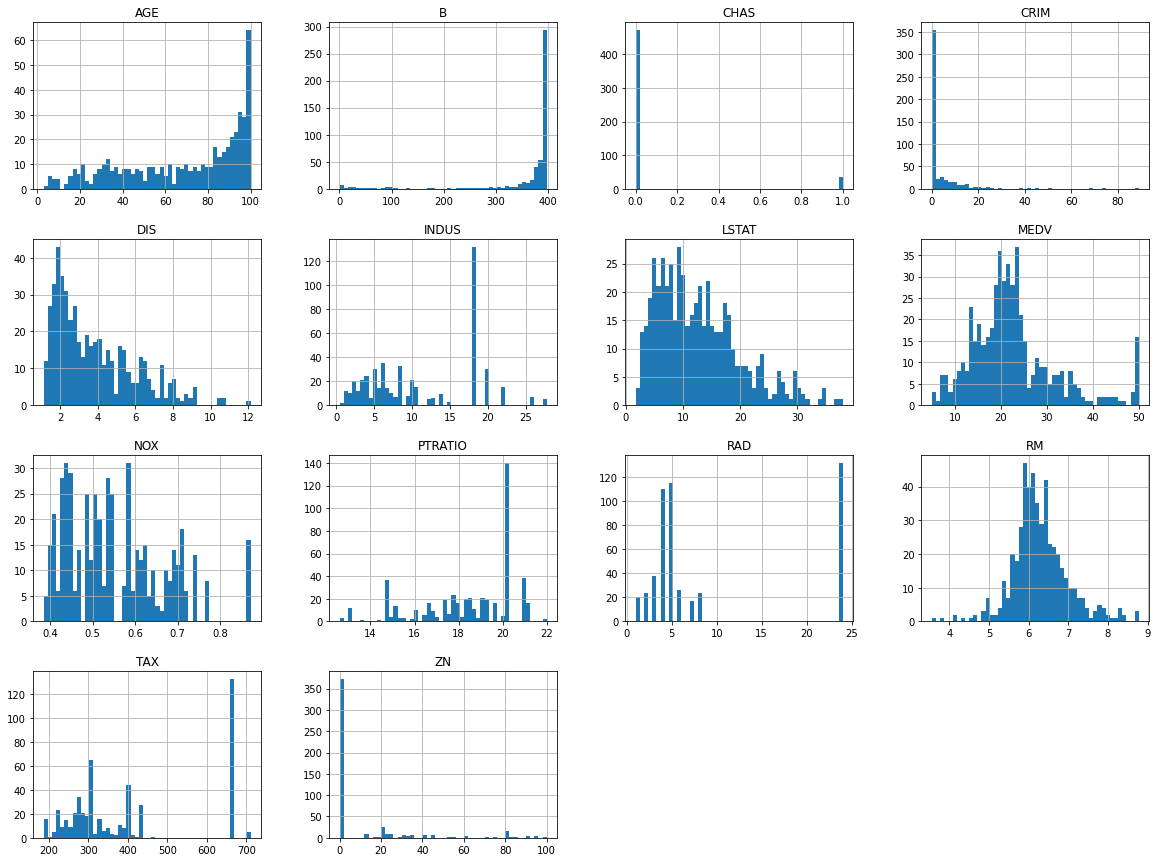

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

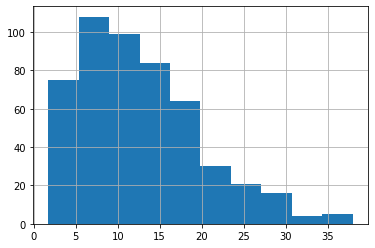

In [ ]:
housing["LSTAT"].hist()

In [ ]:
#Making the distribution of LSTAT more normal

housing["LSTAT_cat"] = pd.cut(housing["LSTAT"],
                      bins=[0., 5, 13, 25, 40, np.inf],
                      labels=[1, 2, 3, 4, 5])

housing["LSTAT_cat"].value_counts()


2    232
3    178
1     62
4     34
5      0
Name: LSTAT_cat, dtype: int64

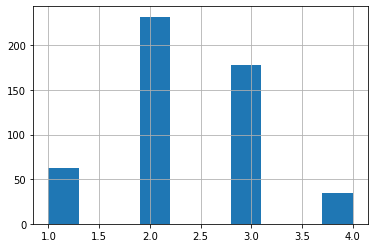

In [ ]:
housing["LSTAT_cat"].hist()

In [ ]:
#Adjusting the Train and Test sets to look more like the population

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=11)
for train_index, test_index in split.split(housing, housing["LSTAT_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Step 3: Discover and Visualize for Insights

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("LSTAT_cat", axis = 1, inplace=True)

In [ ]:
housing = strat_train_set.copy()
housing2 = strat_test_set.copy()

In [ ]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.724289
ZN         0.368822
B          0.344012
DIS        0.236695
CHAS       0.205997
AGE       -0.366694
CRIM      -0.393589
RAD       -0.401787
NOX       -0.428820
TAX       -0.469015
INDUS     -0.475511
PTRATIO   -0.519613
LSTAT     -0.744289
Name: MEDV, dtype: float64

In [ ]:
housing["NOXandFACT"] = housing["INDUS"] * housing["NOX"]
housing2["NOXandFACT"] = housing2["INDUS"] * housing2["NOX"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV          1.000000
RM            0.724289
ZN            0.368822
B             0.344012
DIS           0.236695
CHAS          0.205997
AGE          -0.366694
CRIM         -0.393589
RAD          -0.401787
NOX          -0.428820
TAX          -0.469015
INDUS        -0.475511
NOXandFACT   -0.483603
PTRATIO      -0.519613
LSTAT        -0.744289
Name: MEDV, dtype: float64

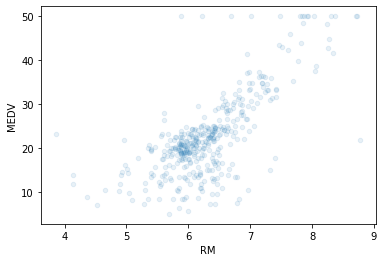

In [ ]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.1)

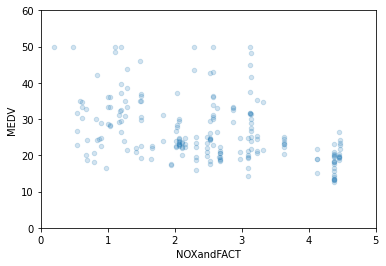

In [ ]:
housing.plot(kind="scatter", x="NOXandFACT", y="MEDV",
             alpha=0.2)
plt.axis([0, 5, 0, 60])
plt.show()

In [ ]:
#Looking for multicollinearity
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOXandFACT
CRIM,1.000000,-0.203785,0.424274,-0.065445,0.423872,-0.206569,0.348129,-0.376986,0.615040,0.583926,0.284418,-0.353835,0.466580,-0.393589,0.445233
ZN,-0.203785,1.000000,-0.537344,-0.039727,-0.518655,0.311111,-0.575807,0.656459,-0.322778,-0.322445,-0.388360,0.173124,-0.415456,0.368822,-0.502227
INDUS,0.424274,-0.537344,1.000000,0.062740,0.780852,-0.372767,0.653425,-0.705935,0.632258,0.742296,0.363597,-0.363302,0.608752,-0.475511,0.971994
CHAS,-0.065445,-0.039727,0.062740,1.000000,0.067457,0.109808,0.084183,-0.102326,-0.038416,-0.060646,-0.144281,0.046503,-0.065984,0.205997,0.071451
NOX,0.423872,-0.518655,0.780852,0.067457,1.000000,-0.289689,0.737918,-0.771368,0.609179,0.670013,0.153184,-0.387888,0.606249,-0.428820,0.888897
RM,-0.206569,0.311111,-0.372767,0.109808,-0.289689,1.000000,-0.222409,0.177865,-0.197824,-0.271795,-0.369218,0.133699,-0.632762,0.724289,-0.363084
AGE,0.348129,-0.575807,0.653425,0.084183,0.737918,-0.222409,1.000000,-0.759131,0.460337,0.503976,0.225499,-0.258510,0.613136,-0.366694,0.684260
DIS,-0.376986,0.656459,-0.705935,-0.102326,-0.771368,0.177865,-0.759131,1.000000,-0.495640,-0.527280,-0.180821,0.279500,-0.499114,0.236695,-0.722682
RAD,0.615040,-0.322778,0.632258,-0.038416,0.609179,-0.197824,0.460337,-0.495640,1.000000,0.924262,0.465402,-0.422489,0.506451,-0.401787,0.649945
TAX,0.583926,-0.322445,0.742296,-0.060646,0.670013,-0.271795,0.503976,-0.527280,0.924262,1.000000,0.444281,-0.432307,0.555013,-0.469015,0.757909


In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOXandFACT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.692031,11.590347,10.899480,0.079208,0.556675,6.305656,68.359406,3.821825,9.673267,406.965347,18.441584,358.205545,12.530297,22.612129,6.689083
std,8.815981,23.305393,6.771705,0.270398,0.117849,0.712363,28.211658,2.132229,8.729868,168.248852,2.208994,88.203309,7.169353,9.391315,5.061574
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.194120
25%,0.082863,0.000000,5.130000,0.000000,0.453000,5.890500,45.075000,2.096725,4.000000,279.000000,17.400000,375.085000,6.867500,17.100000,2.475960
50%,0.294380,0.000000,8.560000,0.000000,0.538000,6.214000,77.150000,3.239250,5.000000,330.000000,19.100000,391.305000,10.925000,21.150000,4.451200
75%,3.694070,20.000000,18.100000,0.000000,0.647000,6.632000,94.150000,5.141475,24.000000,666.000000,20.200000,396.232500,16.780000,25.000000,12.145100
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,17.054180


Step 4: Preparing the Data for Machine Learning Algorithm

In [ ]:
#Feature engineer in these datasets

strat_train_set['NOXandFACT'] = housing['NOXandFACT']
strat_train_set['richhighways'] = housing['TAX']/housing['RAD']
strat_train_set = strat_train_set.drop('INDUS', axis = 1)
strat_train_set = strat_train_set.drop('RAD', axis = 1)

strat_test_set['NOXandFACT'] = housing2['NOXandFACT']
strat_test_set['richhighways'] = housing2['TAX']/housing2['RAD']
strat_test_set = strat_test_set.drop('INDUS', axis = 1)
strat_test_set = strat_test_set.drop('RAD', axis = 1)

housing = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

In [ ]:
housing.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,NOXandFACT,richhighways
118,0.13058,0.0,0,0.547,5.872,73.1,2.4775,432.0,17.8,338.63,15.37,5.47547,72.0
283,0.01501,90.0,1,0.401,7.923,24.8,5.8850,198.0,13.6,395.52,3.16,0.48521,198.0
39,0.02763,75.0,0,0.428,6.595,21.8,5.4011,252.0,18.3,395.63,4.32,1.26260,84.0
148,2.33099,0.0,0,0.871,5.186,93.8,1.5296,403.0,14.7,356.99,28.32,17.05418,80.6
125,0.16902,0.0,0,0.581,5.986,88.4,1.9929,188.0,19.1,385.02,14.81,14.90265,94.0


In [ ]:
housing.corr()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,NOXandFACT,richhighways
CRIM,1.000000,-0.203785,-0.065445,0.423872,-0.206569,0.348129,-0.376986,0.583926,0.284418,-0.353835,0.466580,0.445233,-0.286767
ZN,-0.203785,1.000000,-0.039727,-0.518655,0.311111,-0.575807,0.656459,-0.322445,-0.388360,0.173124,-0.415456,-0.502227,0.328717
CHAS,-0.065445,-0.039727,1.000000,0.067457,0.109808,0.084183,-0.102326,-0.060646,-0.144281,0.046503,-0.065984,0.071451,-0.045598
NOX,0.423872,-0.518655,0.067457,1.000000,-0.289689,0.737918,-0.771368,0.670013,0.153184,-0.387888,0.606249,0.888897,-0.320412
RM,-0.206569,0.311111,0.109808,-0.289689,1.000000,-0.222409,0.177865,-0.271795,-0.369218,0.133699,-0.632762,-0.363084,0.088899
AGE,0.348129,-0.575807,0.084183,0.737918,-0.222409,1.000000,-0.759131,0.503976,0.225499,-0.258510,0.613136,0.684260,-0.262774
DIS,-0.376986,0.656459,-0.102326,-0.771368,0.177865,-0.759131,1.000000,-0.527280,-0.180821,0.279500,-0.499114,-0.722682,0.335255
TAX,0.583926,-0.322445,-0.060646,0.670013,-0.271795,0.503976,-0.527280,1.000000,0.444281,-0.432307,0.555013,0.757909,-0.364164
PTRATIO,0.284418,-0.388360,-0.144281,0.153184,-0.369218,0.225499,-0.180821,0.444281,1.000000,-0.171917,0.368505,0.295161,-0.221859
B,-0.353835,0.173124,0.046503,-0.387888,0.133699,-0.258510,0.279500,-0.432307,-0.171917,1.000000,-0.366304,-0.395180,0.193436


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
        ('std_scaler', StandardScaler())
    ])

housing_prepared = pipe.fit_transform(housing)

Step 5: Select and Train Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = pipe.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [20.97828824 43.88967156 31.5167398  10.10857565 21.37941719]


In [ ]:
print("Labels:", list(some_labels))

Labels: [20.4, 50.0, 30.8, 17.8, 21.4]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.57133484852726

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=11)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.2623618765733313

Step 6: Fine Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 
     'max_features': [2, 3, 4, 6, 8, 10], 
     'max_depth': [10,11,12,13,14,15]},

    {'bootstrap': [False], 
     'n_estimators': [3, 10, 30], 
     'max_features': [2, 3, 4, 6, 8], 
     'max_depth':[10,11,12,13,14,15]}
  ]

forest_reg = RandomForestRegressor(random_state=11)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [ ]:
grid_search.best_estimator_.feature_importances_

array([0.05740261, 0.00461546, 0.01542731, 0.0466233 , 0.33927455,
       0.01833112, 0.05012194, 0.04390993, 0.0750941 , 0.01285348,
       0.2454634 , 0.07969242, 0.01119039])

In [ ]:
#The Test
final_model = grid_search.best_estimator_


X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = pipe.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

2.954763248773004

For this problem, I decided to implement a random forest  model to predict the median house value of homes in Boston. To begin, I looked at the dataset and gave names to the columns. There were no missing values, so that was nice. I used stratified sets to make sure the training and test sets were representative of the population. To stratify, I used the LSTAT variable because then it would represent the actual lower status and upper status feautres of the population.

I tried to see correlations between some features and MEDV by graphing them on a scatter plot. It appeared RM was positively correlated with MEDV. I also decided to look at the correlation matrix between each of the variables to detect signs of multicollinearity, which would make the standard errors for the coefficients of the estimators even wider. I corrected this by feature engineering new variables called "NOXandFACT" and "richhighways". After dropping the features, the error was actually worse because I suspect that the dropped feature helped the other features. I decided to keep them both by combining them into one feature to keep the effects of both and get rid of the multicollinearity. I looked at TAX and RAD and that was a definite case of multicollinearity. I combined them together and made a new variable. These performed better, so I decided to keep them. 

I tried out a basic linear regression model and a random forest model. The random forest model beat the linear regression model by a lot and it performed way better since each of the decision trees in the model was combined into one model. I then fine-tuned the model and ended up finding the optimal model hyperparameters. I trained the final model on the test set and ended with an RMSE of 2.95.

It appears that this model will be the best to help identify fair housing prices for investing in.